# Praktische Übung 3: ML-Workflow

## Aufgabe 1

1. Laden Sie den Datensatz aus der Datei `titanic.csv` in einen Pandas-DataFrame. Die Datei befindet sich im `/data` Ordner auf GitHub.
2. Erstellen Sie einen neuen DataFrame, der nur die folgenden Spalten enthält: `Survived`, `Pclass`, `Age`, `Fare`, `Sibsp`, `Parch`.
3. Unterteilen Sie die Daten mit der Methode `train_test_split` in Trainings- und Testdaten (80% Training, 20% Test). Hinweis: Für die ersten drei Aufgaben können Sie den Code der Lösung der letzten Übung kopieren.
4. Überprüfen Sie welche Attribute `NaN`-Werte enthalten.
5. Füllen Sie diese Werte mit dem Durchschnittswert der übrigen Werte aus der gleichen Spalte auf.

In [314]:
import pandas as pd
pd.options.mode.chained_assignment = None # avoids some (false-positive) warnings

# read data from csv file into a pandas dataframe located in ./data/titanic.csv
df_all = pd.read_csv('./data/titanic.csv')

# create new dataframe with only the columns Survived, Pclass, Age, Farge, Sibsp, Parch
df = df_all[['Survived', 'Pclass', 'Age', 'Fare', 'SibSp', 'Parch']]

df.head()

,Survived,Pclass,Age,Fare,SibSp,Parch
0,0,3,22.0,7.2500,1,0
1,1,1,38.0,71.2833,1,0
2,1,3,26.0,7.9250,0,0
3,1,1,35.0,53.1000,1,0
4,0,3,35.0,8.0500,0,0


In [315]:
from sklearn.model_selection import train_test_split

# use train_test_split to split the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived', axis=1), df['Survived'], test_size=0.2, random_state=42)

In [316]:
# check how often values are missing
X_train.isna().sum()

Pclass      0
Age       140
Fare        0
SibSp       0
Parch       0
dtype: int64

In [317]:
# mean of Age
age_mean = X_train['Age'].mean()
print(age_mean)

X_train['Age'].fillna(age_mean, inplace=True)

29.498846153846156


In [318]:
# check how often values are missing
X_train.isna().sum()

Pclass    0
Age       0
Fare      0
SibSp     0
Parch     0
dtype: int64

## Aufgabe 2

1. Skalieren Sie die Daten aus `x_train` mit einem `StandardScaler`.
2. Trainieren Sie eine logistische Regression auf den skalierten Daten und `y_train`.
3. Entfernen Sie alle Datenpunkte mit `NaN`-Werten aus `x_test`.
4. Entfernen Sie die genau gleichen Zeilen auch aus `y_test`.
5. Skalieren Sie die Datenpunkte `x_test` mit dem gleichen Skalierer wie in Aufgabe 2.
6. Machen Sie eine Vorhersage aus den skalierten Testdaten und berechnen Sie Accuracy, Precision und Recall.

In [319]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)

X_scaled = scaler.transform(X_train)
X_scaled

array([[-1.61413602,  1.2322632 , -0.07868358, -0.47072241, -0.47934164],
       [-0.40055118, -0.50048197, -0.37714494, -0.47072241, -0.47934164],
       [ 0.81303367,  0.1926161 , -0.47486697, -0.47072241, -0.47934164],
       ...,
       [ 0.81303367,  0.88571416, -0.35580399,  1.23056874, -0.47934164],
       [-1.61413602, -1.19358003,  1.68320121,  0.37992316,  2.04874166],
       [-1.61413602, -0.65450376,  0.86074761, -0.47072241,  0.78470001]])

In [320]:
# train logistic regression model
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression()
reg.fit(X_scaled, y_train)

LogisticRegression()

In [321]:
# remove all NaN values from the test data
print(X_test.shape)

# drop na values from test data and store in X_test_clean
X_test = X_test.dropna()
X_test.shape

(179, 5)


(142, 5)

In [322]:
# select the remaining rows from the test data for y_test_clean
print(y_test.shape)
y_test = y_test[X_test.index]
y_test.shape

(179,)


(142,)

In [323]:
# use scaler to scale the test data
X_test_scaled = scaler.transform(X_test)

In [324]:
# predict the test data
y_pred = reg.predict(X_test_scaled)

# calculate metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score 

print('Accuracy: ', accuracy_score(y_test, y_pred))

print('Precision: ', precision_score(y_test, y_pred))

print('Recall: ', recall_score(y_test, y_pred))

Accuracy:  0.7464788732394366
Precision:  0.7894736842105263
Recall:  0.5172413793103449


## Aufgabe 3

1. Fügen Sie `Embarked` und `Sex` als weitere Feature hinzu.
2. Führen Sie ein one-hot-encoding dieser Attribute durch und durchlaufen Sie die Schritte aus Aufgabe 1 und 2, um das Modell mit den Features zu trainieren.
3. Vergleichen Sie die Performance des Modells mit und ohne diese Features.

In [325]:
# create second dataframe with same columns as the first one and new columns Embarked, Sex
df2 = df_all[['Survived', 'Pclass', 'Age', 'Fare', 'SibSp', 'Parch', 'Embarked', 'Sex']]

df2.head()

,Survived,Pclass,Age,Fare,SibSp,Parch,Embarked,Sex
0,0,3,22.0,7.2500,1,0,S,male
1,1,1,38.0,71.2833,1,0,C,female
2,1,3,26.0,7.9250,0,0,S,female
3,1,1,35.0,53.1000,1,0,S,female
4,0,3,35.0,8.0500,0,0,S,male


In [326]:
# one-hot encode Embarked and Sex
df2 = pd.get_dummies(df2, columns=['Embarked', 'Sex'])

print(df2.shape)
df2.head()

(891, 11)


,Survived,Pclass,Age,Fare,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,0,3,22.0,7.2500,1,0,0,0,1,0,1
1,1,1,38.0,71.2833,1,0,1,0,0,1,0
2,1,3,26.0,7.9250,0,0,0,0,1,1,0
3,1,1,35.0,53.1000,1,0,0,0,1,1,0
4,0,3,35.0,8.0500,0,0,0,0,1,0,1


In [327]:
# train test split on Survived and the new dataframe
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(df2.drop('Survived', axis=1), df2['Survived'], test_size=0.2, random_state=42)

In [328]:
# check how often values are missing
X_train_2.isna().sum()

Pclass          0
Age           140
Fare            0
SibSp           0
Parch           0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
Sex_female      0
Sex_male        0
dtype: int64

In [329]:
# mean of Age
mean_age_2 = X_train_2['Age'].mean()
print(mean_age_2)

# fill missing values with mean
X_train_2['Age'].fillna(mean_age_2, inplace=True)

# check how often values are missing
X_train_2.isna().sum()


29.498846153846156


Pclass        0
Age           0
Fare          0
SibSp         0
Parch         0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
Sex_female    0
Sex_male      0
dtype: int64

In [330]:
# create new standard scaler
scaler2 = StandardScaler().fit(X_train_2)

# scale the data
X_scaled_2 = scaler2.transform(X_train_2)
X_scaled_2

array([[-1.61413602,  1.2322632 , -0.07868358, ...,  0.59681695,
        -0.7243102 ,  0.7243102 ],
       [-0.40055118, -0.50048197, -0.37714494, ...,  0.59681695,
        -0.7243102 ,  0.7243102 ],
       [ 0.81303367,  0.1926161 , -0.47486697, ...,  0.59681695,
        -0.7243102 ,  0.7243102 ],
       ...,
       [ 0.81303367,  0.88571416, -0.35580399, ...,  0.59681695,
        -0.7243102 ,  0.7243102 ],
       [-1.61413602, -1.19358003,  1.68320121, ...,  0.59681695,
         1.38062393, -1.38062393],
       [-1.61413602, -0.65450376,  0.86074761, ...,  0.59681695,
        -0.7243102 ,  0.7243102 ]])

In [331]:
# train logistic regression model
reg2 = LogisticRegression()
reg2.fit(X_scaled_2, y_train_2)

LogisticRegression()

In [332]:
# remove all NaN values from the test data
print(X_test_2.shape)

# drop na values from test data
X_test_2 = X_test_2.dropna()
X_test_2.shape

(179, 10)


(142, 10)

In [333]:
# select the remaining rows from the test data for y_test_2
print(y_test_2.shape)

y_test_2 = y_test_2[X_test_2.index]
y_test_2.shape

(179,)


(142,)

In [334]:
# use scaler to scale the test data
X_test_scaled_2 = scaler2.transform(X_test_2)

In [335]:
# predict the test data
y_pred_2 = reg2.predict(X_test_scaled_2)

In [336]:
# calculate metrics

print('Accuracy: ', accuracy_score(y_test_2, y_pred_2))

print('Precision: ', precision_score(y_test_2, y_pred_2))

print('Recall: ', recall_score(y_test_2, y_pred_2))


Accuracy:  0.8169014084507042
Precision:  0.7962962962962963
Recall:  0.7413793103448276


Accuracy:  9.433962264150946
Precision:  0.8641975308641939
Recall:  43.33333333333333
['green', 'green', 'green']


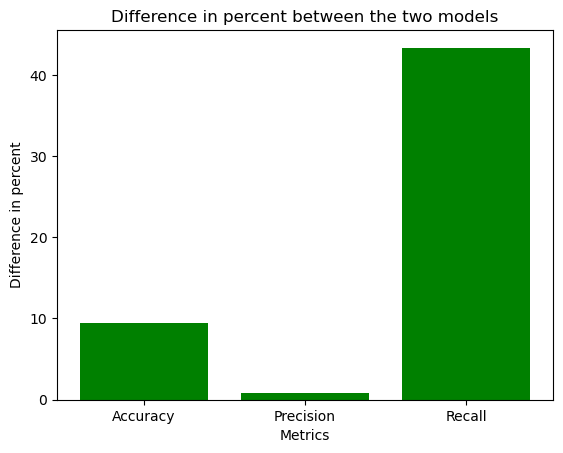

In [337]:
# calculate improvement in percent for accuracy, precision and recall
print('Accuracy: ', (accuracy_score(y_test_2, y_pred_2) - accuracy_score(y_test, y_pred)) / accuracy_score(y_test, y_pred) * 100)

print('Precision: ', (precision_score(y_test_2, y_pred_2) - precision_score(y_test, y_pred)) / precision_score(y_test, y_pred) * 100)

print('Recall: ', (recall_score(y_test_2, y_pred_2) - recall_score(y_test, y_pred)) / recall_score(y_test, y_pred) * 100)

# plot those metrics
import matplotlib.pyplot as plt

# create a list of the metrics
metrics = ['Accuracy', 'Precision', 'Recall']

# create a list of the values
values = [accuracy_score(y_test_2, y_pred_2), precision_score(y_test_2, y_pred_2), recall_score(y_test_2, y_pred_2)]

# create a list of the values of the first model
values_1 = [accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred)]

# create a list of the differences
diff = [values[i] - values_1[i] for i in range(len(values))]

# create a list of the differences in percent
diff_percent = [diff[i] / values_1[i] * 100 for i in range(len(diff))]

# create a list of the colors
colors = ['green' if diff_percent[i] > 0 else 'red' for i in range(len(diff_percent))]
print(colors)

# create a list of the x positions
x_pos = [i for i, _ in enumerate(metrics)]

# create a bar chart
plt.bar(x_pos, diff_percent, color=colors)

# add labels
plt.xlabel('Metrics')
plt.ylabel('Difference in percent')
plt.title('Difference in percent between the two models')

# add x ticks
plt.xticks(x_pos, metrics)

# show the plot
plt.show()

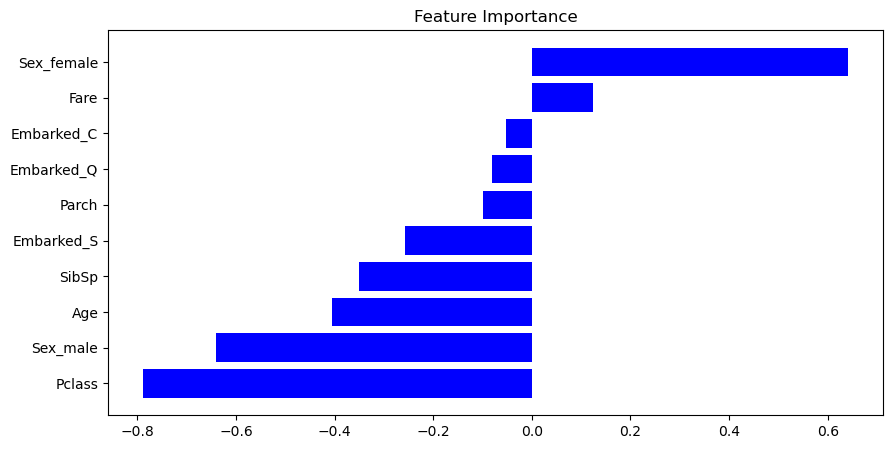

In [338]:

# plot the importance of the features
import matplotlib.pyplot as plt
import numpy as np

# get the feature importance from the model
importances = reg2.coef_[0]

# sort the feature importance
indices = np.argsort(importances)

# create plot
plt.figure(figsize=(10, 5))

# create plot title
plt.title('Feature Importance')

# add bars
plt.barh(range(len(indices)), importances[indices], color='b', align='center')

# add feature names as y-axis labels
plt.yticks(range(len(indices)), X_train_2.columns[indices])

# show plot
plt.show()

## Bonus

Entwerfen Sie ein Feature aus dem Attribut `Cabin` und schauen Sie, ob sich das Modell dadurch verbessert.